# 基于CNN模型的物体识别

## 0.先完成理论部分即可

## 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

## 2.回答以下理论题目?

### 2.1. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

#### 答：参数的个数只和filter的个数以及filter的大小有关，所以有(5\*5+1)\*50=1300个参数

### 2.2. What are "local invariant" and "parameter sharing" ?
#### 答：1、意思是说图像上的特征和特征有关，和它在哪个位置无关<br>2、每一层卷积的过程是通过滤波器Filter去扫图片的局部区域，虽然输入在变化，但是滤波器是不会变，即权重不会变，就是所谓的参数共享

### 2.3. Why we use batch normalization ?
#### 答：BN层是添加在激活函数前，对输入激活函数的输入进行归一化。这样解决输入数据的分布发生偏移和增大的印象。保持每一层的输入的分布一致

### 2.4. What problem does dropout try to solve ?
#### 答: 随机的选择某几个神经元，让其不参数计算。起到类似降维的作用。进而简化模型，提高模型的泛化能力，避免过拟合

## 3. 实践题

### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

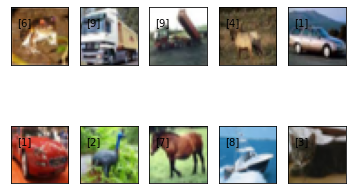

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1].transpose(1,2,0))
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [16]:
x_train[0:2]

array([[[[ 59,  43,  50, ..., 158, 152, 148],
         [ 16,   0,  18, ..., 123, 119, 122],
         [ 25,  16,  49, ..., 118, 120, 109],
         ...,
         [208, 201, 198, ..., 160,  56,  53],
         [180, 173, 186, ..., 184,  97,  83],
         [177, 168, 179, ..., 216, 151, 123]],

        [[ 62,  46,  48, ..., 132, 125, 124],
         [ 20,   0,   8, ...,  88,  83,  87],
         [ 24,   7,  27, ...,  84,  84,  73],
         ...,
         [170, 153, 161, ..., 133,  31,  34],
         [139, 123, 144, ..., 148,  62,  53],
         [144, 129, 142, ..., 184, 118,  92]],

        [[ 63,  45,  43, ..., 108, 102, 103],
         [ 20,   0,   0, ...,  55,  50,  57],
         [ 21,   0,   8, ...,  50,  50,  42],
         ...,
         [ 96,  34,  26, ...,  70,   7,  20],
         [ 96,  42,  30, ...,  94,  34,  34],
         [116,  94,  87, ..., 140,  84,  72]]],


       [[[154, 126, 105, ...,  91,  87,  79],
         [140, 145, 125, ...,  96,  77,  71],
         [140, 139, 115, ..., 

In [17]:
y_train[0:2]

array([[6],
       [9]], dtype=uint8)

In [39]:
import torch.utils.data as Data
torch_dataset = Data.TensorDataset(torch.LongTensor(x_train), torch.LongTensor(y_train))

In [40]:
loader = Data.DataLoader(
    # 从数据库中每次抽出batch size个样本
    dataset=torch_dataset,
    batch_size=5,shuffle=True)

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [41]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [42]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
trainloader = torch.utils.data.DataLoader(x_train, batch_size=4,
                                          shuffle=True, num_workers=2)

In [44]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(loader):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs.long())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'weight'

In [5]:
import re
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
import torchvision.transforms as transforms

In [5]:
from PIL import Image
import numpy as np

model_urls = {
    'densenet121': 'https://download.pytorch.org/models/densenet121-a639ec97.pth',
    'densenet169': 'https://download.pytorch.org/models/densenet169-b2777c0a.pth',
    'densenet201': 'https://download.pytorch.org/models/densenet201-c1103571.pth',
    'densenet161': 'https://download.pytorch.org/models/densenet161-8d451a50.pth',
}

In [88]:
class _DenseLayer(nn.Sequential):
    
    def __init__(self,num_input_features, growth_rate, bn_size, drop_rate):
        super(_DenseLayer, self).__init__()
        self.add_module("norm1", nn.BatchNorm2d(num_input_features))
        self.add_module("relu1", nn.ReLU(inplace=True))
        self.add_module("conv1", nn.Conv2d(num_input_features, bn_size*growth_rate,
                                           kernel_size=1, stride=1, bias=False))
        self.add_module("norm2", nn.BatchNorm2d(bn_size*growth_rate))
        self.add_module("relu2", nn.ReLU(inplace=True))
        self.add_module("conv2", nn.Conv2d(bn_size*growth_rate, growth_rate,
                                           kernel_size=3, stride=1, padding=1, bias=False))
        self.drop_rate = drop_rate
    
    def forward(self, x):
        new_features = super(_DenseLayer, self).forward(x)
        if self.drop_rate > 0:
            new_features = F.dropout(new_features, p=self.drop_rate, training=self.training)
        return torch.cat([x, new_features], 1)

In [89]:
class _DenseBlock(nn.Sequential):
    """DenseBlock"""
    def __init__(self, num_layers, num_input_features, bn_size, growth_rate, drop_rate):
        super(_DenseBlock, self).__init__()
        for i in range(num_layers):
            layer = _DenseLayer(num_input_features+i*growth_rate, growth_rate, bn_size,
                                drop_rate)
            self.add_module("denselayer%d" % (i+1,), layer)

In [90]:
class _Transition(nn.Sequential):
    """Transition layer between two adjacent DenseBlock"""
    def __init__(self, num_input_feature, num_output_features):
        super(_Transition, self).__init__()
        self.add_module("norm", nn.BatchNorm2d(num_input_feature))
        self.add_module("relu", nn.ReLU(inplace=True))
        self.add_module("conv", nn.Conv2d(num_input_feature, num_output_features,
                                          kernel_size=1, stride=1, bias=False))
        self.add_module("pool", nn.AvgPool2d(2, stride=2))

In [91]:
class DenseNet(nn.Module):
    "DenseNet-BC model"
    def __init__(self, growth_rate=32, block_config=(6, 12, 24, 16), num_init_features=64,
                 bn_size=4, compression_rate=0.5, drop_rate=0, num_classes=1000):
        """
        :param growth_rate: (int) number of filters used in DenseLayer, `k` in the paper
        :param block_config: (list of 4 ints) number of layers in each DenseBlock
        :param num_init_features: (int) number of filters in the first Conv2d
        :param bn_size: (int) the factor using in the bottleneck layer
        :param compression_rate: (float) the compression rate used in Transition Layer
        :param drop_rate: (float) the drop rate after each DenseLayer
        :param num_classes: (int) number of classes for classification
        """
        super(DenseNet, self).__init__()
        # first Conv2d
        self.features = nn.Sequential(OrderedDict([
            ("conv0", nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False)),
            ("norm0", nn.BatchNorm2d(num_init_features)),
            ("relu0", nn.ReLU(inplace=True)),
            ("pool0", nn.MaxPool2d(3, stride=2, padding=1))
        ]))

        # DenseBlock
        num_features = num_init_features
        for i, num_layers in enumerate(block_config):
            block = _DenseBlock(num_layers, num_features, bn_size, growth_rate, drop_rate)
            self.features.add_module("denseblock%d" % (i + 1), block)
            num_features += num_layers*growth_rate
            if i != len(block_config) - 1:
                transition = _Transition(num_features, int(num_features*compression_rate))
                self.features.add_module("transition%d" % (i + 1), transition)
                num_features = int(num_features * compression_rate)

        # final bn+ReLU
        self.features.add_module("norm5", nn.BatchNorm2d(num_features))
        self.features.add_module("relu5", nn.ReLU(inplace=True))

        # classification layer
        self.classifier = nn.Linear(num_features, num_classes)

        # params initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.bias, 0)
                nn.init.constant_(m.weight, 1)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        features = self.features(x)
        out = F.avg_pool2d(features, 7, stride=1).view(features.size(0), -1)
        out = self.classifier(out)
        return out

In [92]:
class DenseNet(nn.Module):
    "DenseNet-BC model"
    def __init__(self, growth_rate=32, block_config=(6, 12, 24, 16), num_init_features=64,
                 bn_size=4, compression_rate=0.5, drop_rate=0, num_classes=1000):
        """
        :param growth_rate: (int) number of filters used in DenseLayer, `k` in the paper
        :param block_config: (list of 4 ints) number of layers in each DenseBlock
        :param num_init_features: (int) number of filters in the first Conv2d
        :param bn_size: (int) the factor using in the bottleneck layer
        :param compression_rate: (float) the compression rate used in Transition Layer
        :param drop_rate: (float) the drop rate after each DenseLayer
        :param num_classes: (int) number of classes for classification
        """
        super(DenseNet, self).__init__()
        # first Conv2d
        self.features = nn.Sequential(OrderedDict([
            ("conv0", nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False)),
            ("norm0", nn.BatchNorm2d(num_init_features)),
            ("relu0", nn.ReLU(inplace=True)),
            ("pool0", nn.MaxPool2d(3, stride=2, padding=1))
        ]))

        # DenseBlock
        num_features = num_init_features
        for i, num_layers in enumerate(block_config):
            block = _DenseBlock(num_layers, num_features, bn_size, growth_rate, drop_rate)
            self.features.add_module("denseblock%d" % (i + 1), block)
            num_features += num_layers*growth_rate
            if i != len(block_config) - 1:
                transition = _Transition(num_features, int(num_features*compression_rate))
                self.features.add_module("transition%d" % (i + 1), transition)
                num_features = int(num_features * compression_rate)

        # final bn+ReLU
        self.features.add_module("norm5", nn.BatchNorm2d(num_features))
        self.features.add_module("relu5", nn.ReLU(inplace=True))

        # classification layer
        self.classifier = nn.Linear(num_features, num_classes)

        # params initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.bias, 0)
                nn.init.constant_(m.weight, 1)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        features = self.features(x)
        out = F.avg_pool2d(features, 7, stride=1).view(features.size(0), -1)
        out = self.classifier(out)
        return out

In [93]:
def densenet121(pretrained=False, **kwargs):
    """DenseNet121"""
    model = DenseNet(num_init_features=64, growth_rate=32, block_config=(6, 12, 24, 16),
                     **kwargs)

    if pretrained:
        # '.'s are no longer allowed in module names, but pervious _DenseLayer
        # has keys 'norm.1', 'relu.1', 'conv.1', 'norm.2', 'relu.2', 'conv.2'.
        # They are also in the checkpoints in model_urls. This pattern is used
        # to find such keys.
        pattern = re.compile(
            r'^(.*denselayer\d+\.(?:norm|relu|conv))\.((?:[12])\.(?:weight|bias|running_mean|running_var))$')
        state_dict = model_zoo.load_url(model_urls['densenet121'])
        for key in list(state_dict.keys()):
            res = pattern.match(key)
            if res:
                new_key = res.group(1) + res.group(2)
                state_dict[new_key] = state_dict[key]
                del state_dict[key]
        model.load_state_dict(state_dict)
    return model

In [ ]:
densenet = densenet121(pretrained=True)
densenet.eval()

img = Image.open("./images/cat.jpg")

trans_ops = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

images = trans_ops(img).view(-1, 3, 224, 224)
outputs = densenet(images)

_, predictions = outputs.topk(5, dim=1)

labels = list(map(lambda s: s.strip(), open("./data/imagenet/synset_words.txt").readlines()))
for idx in predictions.numpy()[0]:
    print("Predicted labels:", labels[idx])

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\MSI-NBOOK/.cache\torch\checkpoints\densenet121-a639ec97.pth
  8%|█████▉                                                                     | 2.44M/30.8M [08:30<6:55:06, 1.20kB/s]

###  Congratulations! You hanve finished the assignment 3.   